Random Forests

In [72]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import joblib


In [73]:
# Loading data
data = Path("train.csv")
df = pd.read_csv(data)
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [74]:
# copy df
clean_df = df.copy()

In [75]:
# drop features that are not relevant

clean_df.drop(['id', 'CustomerId','Surname'], axis = 1, inplace = True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [76]:
# create feature

# Create new columns based on the Gender column
clean_df['Is_Male'] = clean_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
clean_df['Is_Female'] = clean_df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

# Create new columns based on the Geography column
clean_df['Is_Germany'] = clean_df['Geography'].apply(lambda x: 1 if x == 'Germany' else 0)
clean_df['Is_Spain'] = clean_df['Geography'].apply(lambda x: 1 if x == 'Spain' else 0)
clean_df['Is_France'] = clean_df['Geography'].apply(lambda x: 1 if x == 'France' else 0)

In [77]:
clean_df.head(100)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Is_Male,Is_Female,Is_Germany,Is_Spain,Is_France
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,0,1
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0,0,1
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,0,1
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0,0,1
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,588,Germany,Male,30.0,10,126683.40,1,1.0,1.0,131636.55,0,1,0,1,0,0
96,659,Spain,Female,39.0,0,107042.74,1,1.0,0.0,102284.20,1,0,1,0,1,0
97,743,Spain,Male,43.0,2,161807.18,2,0.0,1.0,93228.86,0,1,0,0,1,0
98,639,Germany,Female,43.0,7,123873.52,1,1.0,1.0,51113.17,0,0,1,1,0,0


In [78]:
# drop non-int columns
clean_df.drop(['Geography', 'Gender'], axis = 1, inplace = True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Age              165034 non-null  float64
 2   Tenure           165034 non-null  int64  
 3   Balance          165034 non-null  float64
 4   NumOfProducts    165034 non-null  int64  
 5   HasCrCard        165034 non-null  float64
 6   IsActiveMember   165034 non-null  float64
 7   EstimatedSalary  165034 non-null  float64
 8   Exited           165034 non-null  int64  
 9   Is_Male          165034 non-null  int64  
 10  Is_Female        165034 non-null  int64  
 11  Is_Germany       165034 non-null  int64  
 12  Is_Spain         165034 non-null  int64  
 13  Is_France        165034 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 17.6 MB


In [79]:
# Define features set
X = clean_df.copy()
X.drop("Exited", axis=1, inplace=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Is_Male,Is_Female,Is_Germany,Is_Spain,Is_France
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,1,0,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,1,0,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,1,0,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,1,0,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,1,0,0,1,0


In [80]:
# Define target vector in 9th array
y = clean_df["Exited"].ravel()
y[:9]

array([0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [81]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [82]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [83]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [84]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [85]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [86]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [87]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [88]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [89]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,30676,1892
Actual 1,3952,4739


Accuracy Score : 0.8583581763978768
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     32568
           1       0.71      0.55      0.62      8691

    accuracy                           0.86     41259
   macro avg       0.80      0.74      0.77     41259
weighted avg       0.85      0.86      0.85     41259



## Feature Importance

In [90]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.23351517874104746, 'Age'),
 (0.16761169145757043, 'EstimatedSalary'),
 (0.15764158088383903, 'CreditScore'),
 (0.13797675979873827, 'NumOfProducts'),
 (0.11569713139718156, 'Balance'),
 (0.07670522781394615, 'Tenure'),
 (0.046566766004340114, 'IsActiveMember'),
 (0.02217539420161381, 'Is_Germany'),
 (0.011295565886003627, 'HasCrCard'),
 (0.009391875692738154, 'Is_Female'),
 (0.008345815524521273, 'Is_Male'),
 (0.00808172598008894, 'Is_France'),
 (0.004995286618371273, 'Is_Spain')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

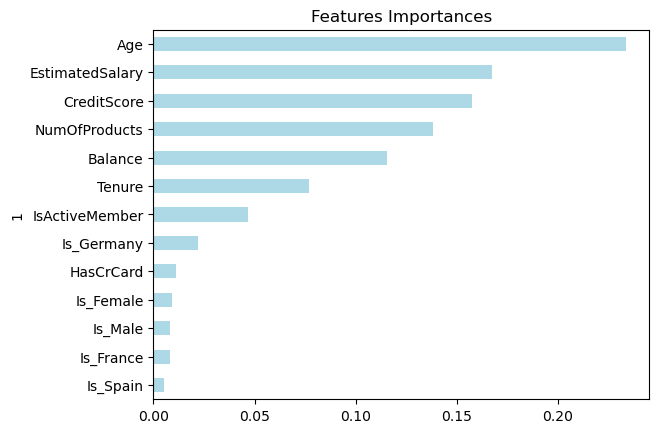

In [91]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightblue', title= 'Features Importances', legend=False)

In [92]:
# save the model to disk
filename = 'randomforest_model'
joblib.dump(rf_model, filename)

['randomforest_model']